In [101]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:


#그래프 matplotilb 를 사용
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import platform

#한글 폰트 사용시 마이너스 폰트 깨짐 해결
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        plt.rc('font', family='Malgun Gothic') 

plt.rcParams['axes.unicode_minus'] = False 

In [102]:
# auto-mpg.cav파일을 읽어서
df = pd.read_csv('dataset/auto-mpg.csv', header=None)
#1 컬럼명 저장
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 
             'weight', 'acceleration', 'model year', 'origin', 'name']
#2 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [103]:
#3 누락 데이터 처리 -> 삭제  ? nan 데이터가 없다.... 
df_ass = df.copy()
nan_col = [df_ass.isnull().sum()>0]
nan_col_names = list(df_ass.columns[nan_col])
df_ass = df_ass.dropna(subset=nan_col_names, how='any', axis='index')
df_ass.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 31.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


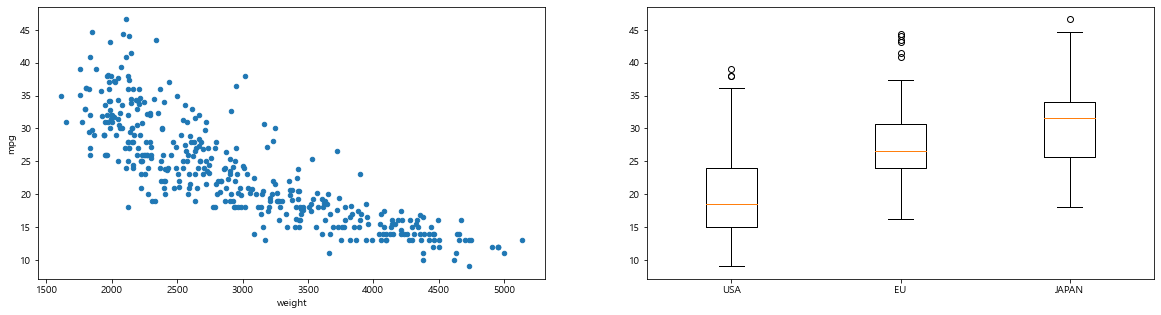

In [105]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
#4 weigh와 mpg의 scatter 그래프 작성
df_ass.plot(x = 'weight', y = 'mpg' , kind = 'scatter', ax=ax1)

#5 제조국가별로 mpg를 boxplot으로 표현
ax2.boxplot(x = [df_ass[df_ass['origin']==1]['mpg'],
                 df_ass[df_ass['origin']==2]['mpg'],
                 df_ass[df_ass['origin']==3]['mpg']],
           labels = ['USA','EU','JAPAN'])

plt.show()

In [ ]:
#6 중복 데이터를 제거 (행 제거)
df_ass.drop_duplicates()

#7 제조국가 1:USA, 2:EU, 3:JPN을 컬럼의 값을 변경
#origin
df.origin.unique() #숫자를 category변경 : 나라이름으로 변경
df.origin.replace({1:'USA',2:'EU',3:'JPN'},inplace=True)
df.origin.unique() 
df.origin = df.origin.astype('category')
df.info()